<a href="https://colab.research.google.com/github/aulphin/Target-Attack/blob/main/Target_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#%cd '/content/drive/MyDrive/Target-Attack_(XAI)'

In [ ]:
 #pip install -r requirements.txt

Manipulate an image to reproduce a given target explanation using

In [ ]:
%cd '/content/drive/MyDrive/Target-Attack_(XAI)/src'

/content/drive/MyDrive/Target-Attack_(XAI)/src


In [ ]:
#%run run_attack.py --cuda

For explanations beyond lrp you need to enable beta_growth so the second derivative of the activations is not zero.

# 'lrp', 'guided_backprop', 'gradient', 'integrated_grad''pattern_attribution', 'grad_times_input'

In [ ]:
%run run_attack.py --cuda --method lrp --beta_growth

no display found. Using non-interactive Agg backend


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 109MB/s]


Iteration 0: Total Loss: 164.1482696533203, Expl Loss: 1.640909075284469e-09, Output Loss: 5.736794861377348e-08
Iteration 1: Total Loss: 162.5136260986328, Expl Loss: 1.6250117917948614e-09, Output Loss: 1.24443690907583e-08
Iteration 2: Total Loss: 160.76014709472656, Expl Loss: 1.6075978326313134e-09, Output Loss: 3.735260156734199e-10
Iteration 3: Total Loss: 159.09544372558594, Expl Loss: 1.5909158435079007e-09, Output Loss: 3.867436593196771e-09
Iteration 4: Total Loss: 157.437255859375, Expl Loss: 1.5742430692355924e-09, Output Loss: 1.2948995653516704e-08
Iteration 5: Total Loss: 155.8317413330078, Expl Loss: 1.5580956524985368e-09, Output Loss: 2.2189556858620563e-08
Iteration 6: Total Loss: 154.21279907226562, Expl Loss: 1.5418423204849319e-09, Output Loss: 2.8570497079272172e-08
Iteration 7: Total Loss: 152.5943603515625, Expl Loss: 1.525634840682244e-09, Output Loss: 3.088766931114151e-08
Iteration 8: Total Loss: 151.06446838378906, Expl Loss: 1.510345515320921e-09, Output 

NameError: name 'ssim_score' is not defined

In [ ]:
org_expl =
adv+expl

In [ ]:
import torch
import torchvision
import torch.nn.functional as F
import numpy as np

In [ ]:
def mse(tensor1, tensor2):
    return torch.mean((tensor1 - tensor2) ** 2).item()

def ssim(tensor1, tensor2, C1=0.01**2, C2=0.03**2):
    # Flatten the tensors if they have channel or spatial dimensions
    if tensor1.dim() > 1:
        tensor1 = tensor1.flatten()
        tensor2 = tensor2.flatten()

    mu1 = torch.mean(tensor1)
    mu2 = torch.mean(tensor2)
    sigma1 = torch.var(tensor1, unbiased=False)
    sigma2 = torch.var(tensor2, unbiased=False)
    sigma12 = torch.mean((tensor1 - mu1) * (tensor2 - mu2))

    ssim_score = ((2 * mu1 * mu2 + C1) * (2 * sigma12 + C2)) / \
                 ((mu1**2 + mu2**2 + C1) * (sigma1 + sigma2 + C2))
    return ssim_score.item()


In [ ]:
mse_val = mse(org_expl, adv_expl)
ssim_val = ssim(org_expl, adv_expl)

print(f"MSE (Original vs Adversarial): {mse_val:.6f}")
print(f"SSIM (Original vs Adversarial): {ssim_val:.6f}")


Plot softplus expanations for various values of beta using

In [ ]:
#%run plot_expl.py --cuda

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
#%load /content/drive/MyDrive/Target-Attack_(XAI)/src/run_attack.py

Experimentation on gini coefficient computation in directly code

In [ ]:
# import numpy as np

In [ ]:
# def gini(array):
#     array = np.array(array, dtype=np.float64)
#     array = np.abs(array)
#     # Values cannot be 0:
#     array += 0.0000001
#     # Values must be sorted:
#     array = np.sort(array)
#     # Index per array element:
#     index = np.arange(1, array.shape[0] + 1)
#     # Number of array elements:
#     n = array.shape[0]
#     # Gini coefficient:
#     return ((np.sum((2 * index - n - 1) * array)) / (n * np.sum(array)))


In [ ]:
# # computing GINI
# from skimage import color

# GINI_list = []
# ori_gini_list = []
# adv_gini_list = []
# adv_expl_np = adv_expl[0].cpu().detach().numpy()
# org_expl_np = org_expl[0].cpu().detach().numpy()


# img1 = org_expl_np
# img2 = adv_expl_np
# # img1_gray = color.rgb2gray(img1)
# # img2_gray = color.rgb2gray(img2)
# GINI_diff = np.abs(gini(img1.flatten()) - gini(img2.flatten()))
# GINI_list.append(GINI_diff)
# ori_gini_list.append(gini(img1.flatten()))
# adv_gini_list.append(gini(img2.flatten()))

In [ ]:
# print(GINI_list)
# print(ori_gini_list)
# print(adv_gini_list)

Design a graph for all the gin values

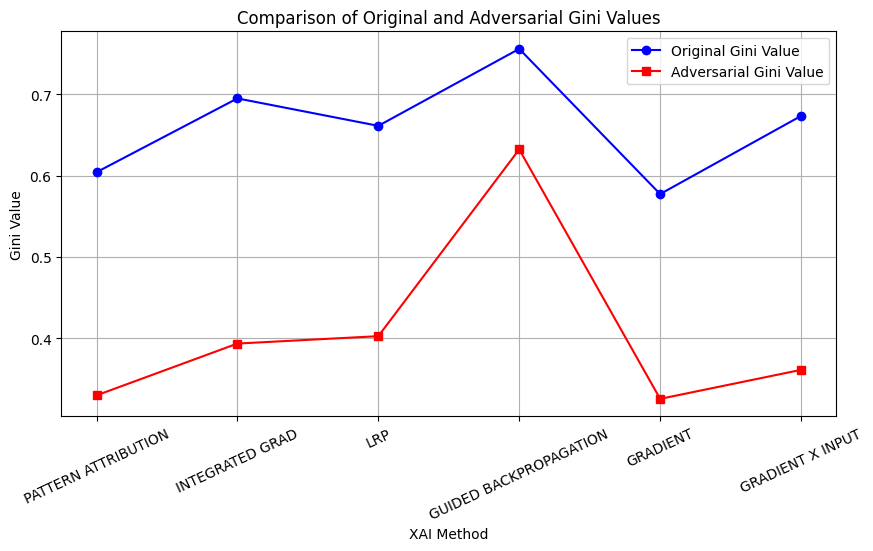

In [ ]:
import matplotlib.pyplot as plt

# Define XAI methods
xai_methods = ["PATTERN ATTRIBUTION", "INTEGRATED GRAD", "LRP",
               "GUIDED BACKPROPAGATION", "GRADIENT", "GRADIENT X INPUT"]

# Gini values from the table
original_gini = [0.6043, 0.6952, 0.6614, 0.7562, 0.5774, 0.6736]
adversarial_gini = [0.3295, 0.3933, 0.4024, 0.6324, 0.3252, 0.3609]

# Create figure and plot
plt.figure(figsize=(10, 5))
plt.plot(xai_methods, original_gini, marker='o', linestyle='-', color='b', label="Original Gini Value")
plt.plot(xai_methods, adversarial_gini, marker='s', linestyle='-', color='r', label="Adversarial Gini Value")

# Labels and Title
plt.xlabel("XAI Method")
plt.ylabel("Gini Value")
plt.title("Comparison of Original and Adversarial Gini Values")
plt.xticks(rotation=25)  # Rotate labels for readability
plt.legend()
plt.grid(True)

# Show plot
plt.show()


For label -99 (FS Attack)

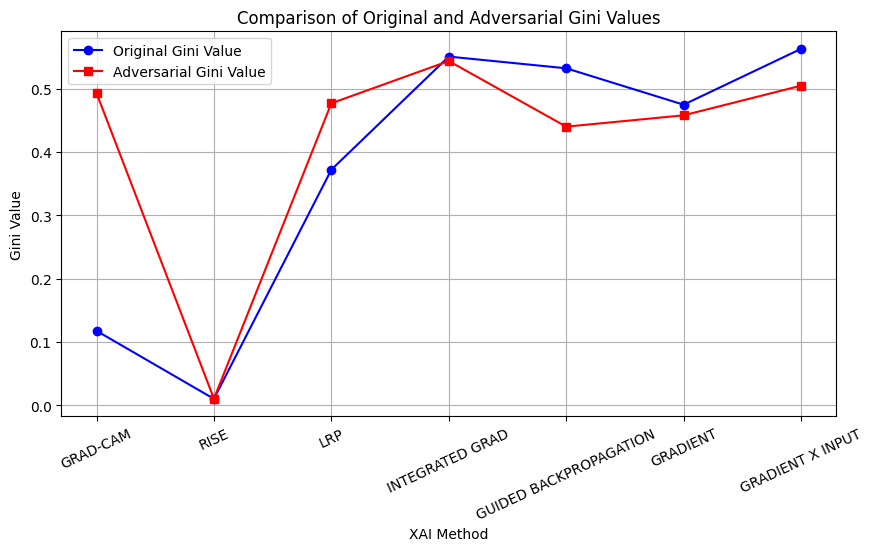

In [ ]:
import matplotlib.pyplot as plt

# Define XAI methods
xai_methods = ["GRAD-CAM" , "RISE", "LRP", "INTEGRATED GRAD",
               "GUIDED BACKPROPAGATION", "GRADIENT", "GRADIENT X INPUT"]

# Gini values from the table
#original_gini = [0.6043, 0.6952, 0.6614, 0.7562, 0.5774, 0.6736]
#original_gini = [0.7587, 0.0162, 0.6656, 0.6466, 0.7696, 0.5065, 0.5855]
original_gini = [0.1174, 0.0099,0.3719,0.5506, 0.5321,0.4746,0.5628]
#adversarial_gini = [0.3295, 0.3933, 0.4024, 0.6324, 0.3252, 0.3609]
#adversarial_gini = [0.4037, 0.0142, 0.5963,0.5905, 0.5290, 0.5210, 0.5909]
adversarial_gini = [0.4930,0.0101,0.4768, 0.5436, 0.4399, 0.4578, 0.5046]

# Create figure and plot
plt.figure(figsize=(10, 5))
plt.plot(xai_methods, original_gini, marker='o', linestyle='-', color='b', label="Original Gini Value")
plt.plot(xai_methods, adversarial_gini, marker='s', linestyle='-', color='r', label="Adversarial Gini Value")

# Labels and Title
plt.xlabel("XAI Method")
plt.ylabel("Gini Value")
plt.title("Comparison of Original and Adversarial Gini Values")
plt.xticks(rotation=25)  # Rotate labels for readability
plt.legend()
plt.grid(True)

# Show plot
plt.show()
